<a href="https://colab.research.google.com/github/munich-ml/MLPy2021/blob/main/32_evaluate_fMNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

## References
Resources used to create this notebook:
- [scikit-learn website](https://scikit-learn.org)
- [Matplotlib website](https://matplotlib.org/)
- [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)
- Hands-on Machine Learning with Scikit-learn, Keras & TensorFlow, Aurelien Geron, [Book on Amazon](https://www.amazon.de/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_3?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=Hands-on+Machine+Learning+with+Scikit-learn%2C+Keras+%26+TensorFlow%2C+Aurelien+Geron%2C&qid=1589875241&sr=8-3)
- Introduction to Machine Learning with Python, Andreas Mueller, [Book on Amazon](https://www.amazon.de/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)


## Setup

First, do the common imports.

Tensorflow must be 2.x, because there are major changes from 1.x

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Setup matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

in_colab = 'google.colab' in sys.modules   # check if note is executed within Colab

# Forces tensorflow version (only in colab)
if in_colab:
    %tensorflow_version 2.x           

# Clone the repository if executed in Google Colab
if in_colab:  
    if "MLPy2021" in os.listdir():
        !git -C MLPy2021 pull
    else:
        !git clone https://github.com/munich-ml/MLPy2021/

# lib.helper_funcs.py. The import path depends on Colab or local execution 
if in_colab:
    from MLPy2021.lib.helper_funcs import plot_confusion_matrix, plot_prediction_examples, pickle_in
else: 
    from lib.helper_funcs import plot_confusion_matrix, plot_prediction_examples, pickle_in


remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/munich-ml/MLPy2021
   3aa87c8..a1e406c  main       -> origin/main
Updating 3aa87c8..a1e406c
Fast-forward
 31_fMNIST_classifier_keras.ipynb | 41 +++++++++++++++-------------------------
 1 file changed, 15 insertions(+), 26 deletions(-)


# Load a model

## Mount google drive

In [3]:
mount_dir = os.path.join(os.getcwd(), "drive")
mount_dir

'/content/drive'

In [4]:
from google.colab import drive
drive.mount(mount_dir)

Mounted at /content/drive


## load_model()



In [5]:
save_dir = os.path.join(mount_dir, "My Drive", "Colab Notebooks", "models")
os.listdir(save_dir)

['fMNIST_NN_v1_ageron.h5',
 'fMNIST_NN_v1_ageron_data.pkl',
 'fMNIST_CNN_v6_cmasch.h5',
 'fMNIST_CNN_v6_cmasch_data.pkl',
 'fMNIST_CNN_v4_ageron.h5',
 'fMNIST_CNN_v4_ageron_data.pkl']

In [6]:
fn = "fMNIST_NN_v1_ageron"	
model = keras.models.load_model(os.path.join(save_dir, fn + ".h5"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Load the validation and test data

In [7]:
print([var for var in vars() if not var.startswith("_")])

['In', 'Out', 'get_ipython', 'exit', 'quit', 'sys', 'os', 'np', 'pd', 'mpl', 'plt', 'warnings', 'tf', 'keras', 'in_colab', 'plot_confusion_matrix', 'plot_prediction_examples', 'pickle_in', 'mount_dir', 'drive', 'save_dir', 'fn', 'model']


In [8]:
pickle_in(os.path.join(save_dir, fn+'_data.pkl'), locals())

pickle_in: Updating scope with the following variables:
['X_test', 'y_test', 'class_names', 'X_valid', 'y_valid']


In [9]:
print([var for var in vars() if not var.startswith("_")])

['In', 'Out', 'get_ipython', 'exit', 'quit', 'sys', 'os', 'np', 'pd', 'mpl', 'plt', 'warnings', 'tf', 'keras', 'in_colab', 'plot_confusion_matrix', 'plot_prediction_examples', 'pickle_in', 'mount_dir', 'drive', 'save_dir', 'fn', 'model', 'X_test', 'y_test', 'class_names', 'X_valid', 'y_valid']


In [10]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

# Evaluate the model


###model.evaluate()


`model.evaluate()` predicts restults on the testset and computes loss and metrics with respect to the expected results  

In [13]:
model.evaluate(X_valid, y_valid);

157/157 [==============================] - 1s 2ms/step - loss: 0.3082 - accuracy: 0.8878


### model.predict()

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
y_proba = model.predict(X_valid[:5])
pd.DataFrame(y_proba, columns=class_names).T

,0,1,2,3,4
T-shirt,0.00,0.00,0.00,0.00,0.00
Trouser,0.00,0.00,0.00,0.00,0.00
Pullover,0.00,0.00,0.00,0.06,0.00
Dress,0.00,0.00,0.00,0.00,0.00
Coat,0.00,0.00,0.00,0.81,0.00
Sandal,0.00,0.00,0.00,0.00,0.00
Shirt,0.00,0.00,0.00,0.12,0.00
Sneaker,0.00,0.00,1.00,0.00,0.00
Bag,1.00,1.00,0.00,0.00,1.00
Ankle boot,0.00,0.00,0.00,0.00,0.00


### model.predict_classes()

In [16]:
y_pred = model.predict_classes(X_valid)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([8, 8, 7, ..., 9, 7, 7])

In [17]:
np.array(class_names)[y_pred]

array(['Bag', 'Bag', 'Sneaker', ..., 'Ankle boot', 'Sneaker', 'Sneaker'],
      dtype='<U10')

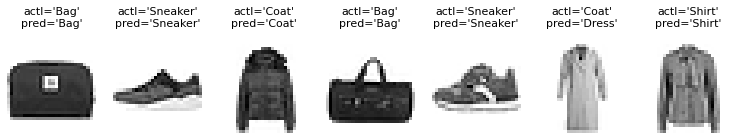

In [18]:
some_indexes = [1, 2, 3, 4, 11, 12, 23]
plt.figure(figsize=(13, 2.5))
for col, index in enumerate(some_indexes):
    plt.subplot(1, len(some_indexes), col+1)
    plt.imshow(np.squeeze(X_valid[index]), cmap="binary")
    title = "actl='{}'\n".format(class_names[y_valid[index]])
    title +="pred='{}'\n".format(class_names[y_pred[index]])
    plt.title(title, fontsize=11), plt.axis('off')

## Confusion matrix

A confusion matrix is a two dimensional histogram of actual (rows) and predicted (cols) classes. 
- the main diagonal are correct predictions
- all other entries are fails

In [19]:
confusion = tf.math.confusion_matrix(y_valid, y_pred)
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[404,   0,   8,  14,   4,   0,  66,   0,   3,   0],
       [  1, 500,   0,  10,   0,   0,   2,   0,   0,   0],
       [  7,   0, 404,   4,  35,   0,  55,   0,   1,   0],
       [ 11,   4,   3, 436,  14,   0,   9,   0,   3,   0],
       [  0,   0,  35,  15, 415,   0,  53,   0,   3,   0],
       [  0,   0,   0,   0,   0, 502,   0,   9,   2,   5],
       [ 47,   1,  24,  16,  22,   0, 401,   0,   8,   0],
       [  0,   0,   0,   0,   0,  14,   0, 437,   0,  11],
       [  5,   0,   2,   0,   4,   0,   7,   1, 470,   0],
       [  0,   0,   0,   0,   0,   7,   0,  16,   0, 470]], dtype=int32)>

###Exercise 
Previously, we computed the **accurary** using `model.evaluate()`. Accuracy is defined by:

$
\text{accuracy} = \cfrac{\text{all}True}{\text{all}} 
$ 

Check that result with the confusion matrix supported by **numpy**.


Hint: The follwing line converts the **tensor** `confusion` into a **numpy array** and computes the sum of all items.
```python
np.array(confusion).sum()
```



### Plotting the confusion matrix

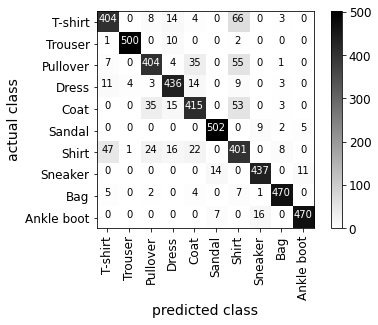

In [20]:
plot_confusion_matrix(confusion, xticks=class_names, yticks=class_names)

Interpretation of the confusion matrix?

One usually focusses on the **false predictions**, thus ignoring the main diagonal may improve the visualization:

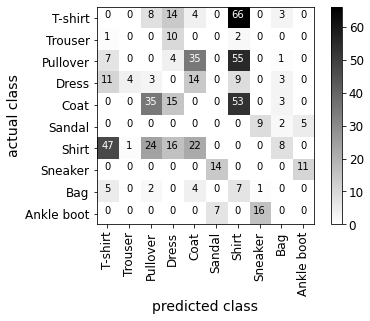

In [21]:
plot_confusion_matrix(confusion, xticks=class_names, yticks=class_names, ignore_main_diagonal=True)

## Performance measures for classifiers

A **Digit-5 detector** is used as an example to compare different performance metrics:

![](https://github.com/munich-ml/MLPy2021/blob/main/images/digit5-detector.png?raw=1)

**True negative** for instance means:
- **True**: The digit was classified correctly
- **negative**: The digit is **not** a 5



### Accuracy

Accuracy is a good measure for symmetric datasets. It's definition again:

$
\text{accuracy} = \cfrac{\text{all}True}{\text{all}} 
$ 

If the counts of **false negatives** greatly differ from the **false positives** or if their costs are greatly different, alternative performance measures are required.

### Precision
Precision (ideally 1.0) is decreased by **false positives** (FP). FP means the prediction `True` is wrong.

$
\text{precision} = \cfrac{TP}{\text{all}P} = \cfrac{TP}{TP + FP}
$

Example application: *Email Spam Detection*
FP (mail sorted out) is worse than FN (spam coming through)


### Recall (or sensitivity)
Recall (ideally 1.0) says how good a model is at detecting the positives. 

Recall is decreased by **false negatives** (FN). FN means the prediction `False` is wrong.

$
\text{recall} = \cfrac{TP}{\text{all}T} = \cfrac{TP}{TP + FN}
$

Example application: *Medical Diabetic Detection*

FN (Diabetic not detected) is worse than FP (Diabetic detected but patient is healthy)


### Specificity 
Specificity says how good a model is at detecting the negatives (avoiding false alarms).
$
\text{specificity} = \cfrac{TN}{\text{all}N} = \cfrac{TN}{TN + FP}
$

### F1-score
*Harmonic mean* of precision and recall. 

$
F_1 = \cfrac{2}{{precision^{-1}} + {recall^{-1}}} = 2 \times \cfrac{\text{precision}\, \times \, \text{recall}}{\text{precision}\, + \, \text{recall}} 
$

Whereas *regular mean* treats all values equally, the *harmonic mean* gives more weight to low values.

Evaluating the **Digit-5 detector** for the various metrics

![](https://github.com/munich-ml/MLPy2021/blob/main/images/precision-recall.png?raw=1)


In [22]:
tn, fp, fn, tp = 5, 1, 2, 3

perf = {}
perf["accuracy"] = (tp+tn) / (tp+tn+fp+fn)
perf["precision"] = tp / (tp+fp)
perf["recall"] = tp / (tp+fn)
perf["specificity"] = tn / (tn+fp)
perf["F1-score"] = 2 * perf["precision"]*perf["recall"] / (perf["precision"]+perf["recall"])

for label, value in perf.items():
    print("{:12s}{:.0%}".format(label, value))

accuracy    73%
precision   75%
recall      60%
specificity 83%
F1-score    67%


## Classification report of the fMNIST-model


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt       0.85      0.81      0.83       499
     Trouser       0.99      0.97      0.98       513
    Pullover       0.85      0.80      0.82       506
       Dress       0.88      0.91      0.89       480
        Coat       0.84      0.80      0.82       521
      Sandal       0.96      0.97      0.96       518
       Shirt       0.68      0.77      0.72       519
     Sneaker       0.94      0.95      0.94       462
         Bag       0.96      0.96      0.96       489
  Ankle boot       0.97      0.95      0.96       493

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



### Exercise 
Check the *precision* and *recall* values returned by `classification_report()` for one class (e.g. 'Coat')


####Solution

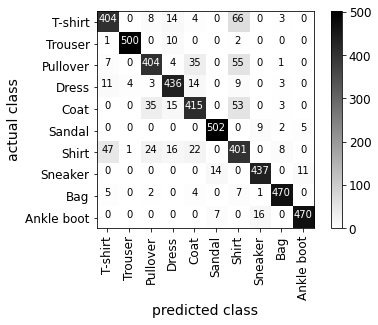

In [24]:
plot_confusion_matrix(confusion, xticks=class_names, yticks=class_names)

In [25]:
CLASS_LABEL = "Coat"
idx = class_names.index(CLASS_LABEL)
idx

4

In [26]:
type(confusion)

tensorflow.python.framework.ops.EagerTensor

Convert the **Tensor** into a familiar **numpy array** 

In [27]:
cm = np.array(confusion)
cm

array([[404,   0,   8,  14,   4,   0,  66,   0,   3,   0],
       [  1, 500,   0,  10,   0,   0,   2,   0,   0,   0],
       [  7,   0, 404,   4,  35,   0,  55,   0,   1,   0],
       [ 11,   4,   3, 436,  14,   0,   9,   0,   3,   0],
       [  0,   0,  35,  15, 415,   0,  53,   0,   3,   0],
       [  0,   0,   0,   0,   0, 502,   0,   9,   2,   5],
       [ 47,   1,  24,  16,  22,   0, 401,   0,   8,   0],
       [  0,   0,   0,   0,   0,  14,   0, 437,   0,  11],
       [  5,   0,   2,   0,   4,   0,   7,   1, 470,   0],
       [  0,   0,   0,   0,   0,   7,   0,  16,   0, 470]], dtype=int32)

In [28]:
tp = cm[idx, idx]
tp

415

FP are all items predicted as ``CLASS_LABEL`` minus TP

In [29]:
all_positive_predictions = cm[:, idx].sum()
fp = all_positive_predictions - tp
fp

79

FN are all actual ``CLASS_LABEL`` items minus TP

In [30]:
fn = cm[idx, :].sum() - tp
fn

106

In [31]:
print("Class '{}': precision={:.2f}, recall={:.2f}".format(CLASS_LABEL, tp/(tp+fp), tp/(tp+fn)))

Class 'Coat': precision=0.84, recall=0.80


**Conclusion**: The ``classification_report`` output is proven to be correct!

## Examples of predictions


Let's look at some examples of right and wrong predictions.

In [32]:
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Evaluating examples of test_class=6, 'Shirt'
- true pos: 401 images
- true neg: 4289 images
- false pos: 192 images
- false neg: 118 images


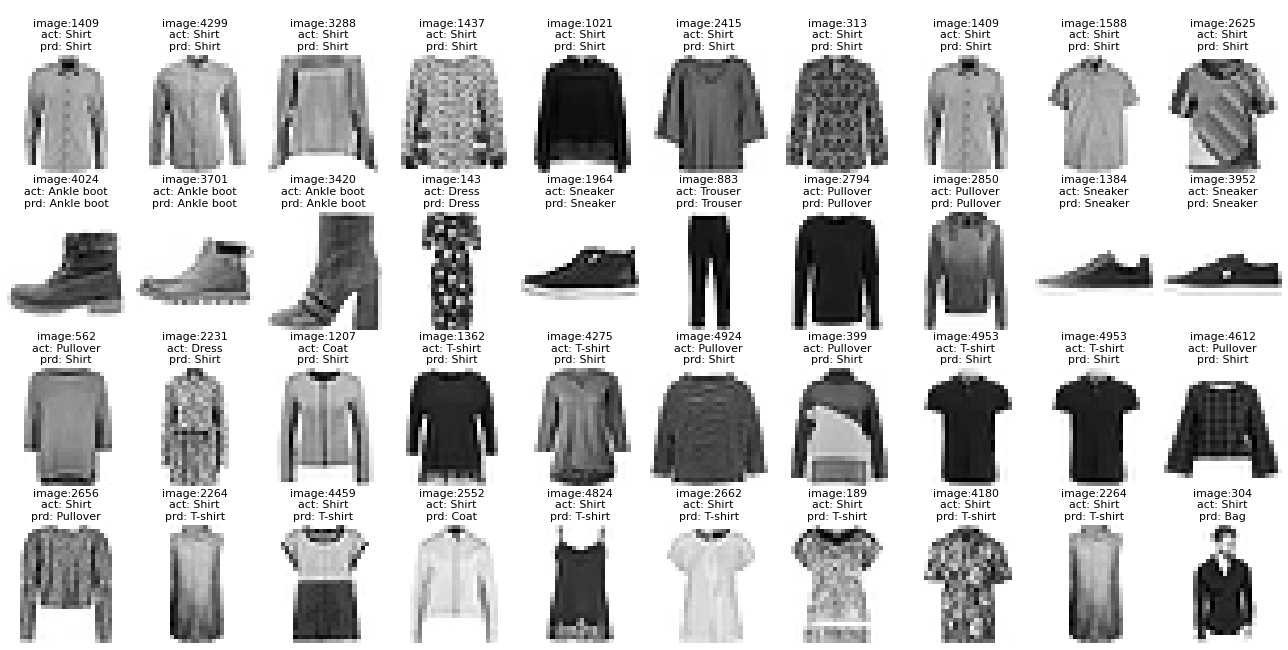

In [33]:
validation_class = 6
plot_prediction_examples(validation_class, class_names, y_pred, y_valid, X_valid)